In [110]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

C:\Users\Hamidreza\anaconda3\lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


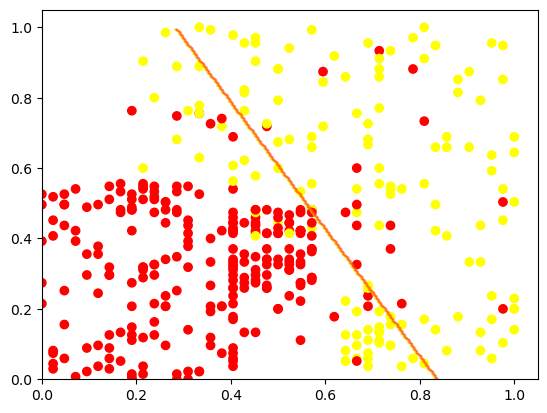

In [111]:
#ReadDataset
data = pd.read_csv(r"C:\Users\Hamidreza\Projects\Jupyter\age_salary.csv")

# X Preprocessing
x = data.iloc[:,1:4]
gender_map = {"Male":1,"Female":0}
x["Gender"] = x["Gender"].map(gender_map)

# Y Preprocessing
y = data.iloc[:,4]
y = pd.DataFrame(y)

# Set Different Color for Targets
colormap = {0:"red",1:"yellow"}
colorlist = y["Purchased"].map(colormap)

# Normalize X
scaler = MinMaxScaler()
x = scaler.fit_transform(x)
x = pd.DataFrame(x)

# Feature Selection
correlations = x.corrwith(y)
x = x.iloc[:,1:3]

# Plot Data with different color for targets (based on two features)
ax =plt.axes()
ax.scatter(x.iloc[:,0],x.iloc[:,1],color=colorlist,alpha=1)

# Set range & design meshgrid
xax,yax = np.arange(0,1,.005),np.arange(0,1,.005)
xx, yy = np.meshgrid(xax,yax)

# convert xx & yy to 1 row array 
xx_ravel = xx.ravel()
yy_ravel = yy.ravel()

# train model
model = SVC(kernel="linear",random_state=42).fit(x,y)

# make a xgrid dataframe to save meshgrid's values
xgrid = pd.DataFrame([xx_ravel,yy_ravel]).T

# try to draw decision bundery on meshgrid
ygrid = model.predict(xgrid)

# reshape ygrid to 2-d array 
ygrid = ygrid.reshape(xx.shape)

# final step & plot decision bundary on meshgrid
ax.contour(xx,yy,ygrid, cmap=plt.cm.autumn_r,alpha=.3)